In [96]:
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from TargetRFC import *
import TargetRFC as trfc
reload(trfc)

<module 'TargetRFC' from 'TargetRFC.pyc'>

In [98]:
%autoreload 2
%aimport TargetRFC

In [20]:
full_df = get_train_readouts()

In [33]:
labels = full_df.values[:,-1]
labels_revised = relabel(labels)

In [34]:
data_df = full_df.drop('targetPos', axis=1)

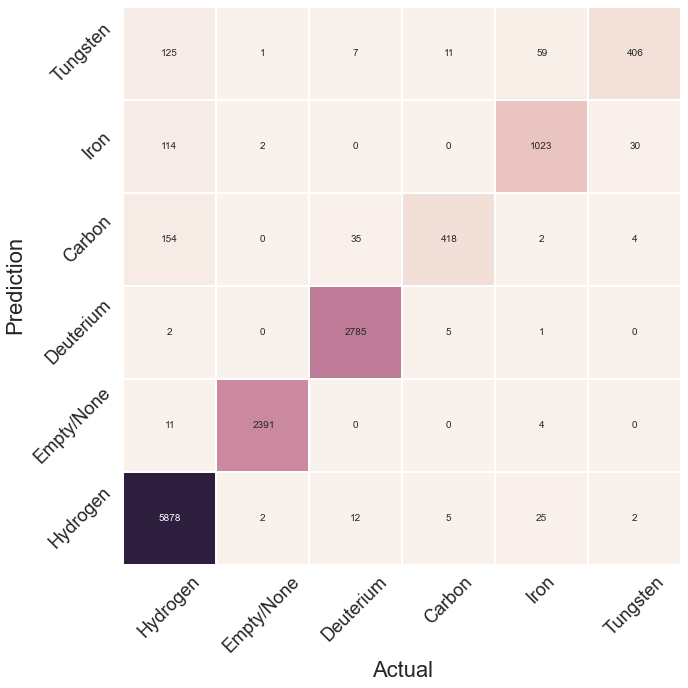

Hydrogen:   	93.54%
Empty/None:   	99.79%
Deuterium:   	98.1%
Carbon:   	95.22%
Iron:   	91.83%
Tungsten:   	91.86%


In [99]:
test_rfc = test_rfc(data_df, labels_revised)

In [100]:
useful_features = get_useful_features(data_df, test_rfc)

In [101]:
rfc, scale = make_full_rfc(data_df, labels_revised, useful_features)

In [102]:
test_data_df = get_test_readouts()
norm_test_data_df = norm_to_g2sem(test_data_df)
norm_test_data = norm_test_data_df[useful_features].values
test_scale = StandardScaler().fit(norm_test_data)
test_data_scaled = test_scale.transform(norm_test_data)
results = rfc.predict(test_data_scaled)

In [103]:
hist, bin_edges = np.histogram(results, bins=6)
print hist

[1603 1398 1537   47  268  205]


In [104]:
test_data_df['prediction'] = results

In [105]:
try:
    db = mdb.connect(read_default_file='../.my.cnf',
                     read_default_group='guest',
                     host=SERVER,
                     db=SOURCE_SCHEMA,
                     port=PORT)

    query = ("SELECT runID, spillID FROM Spill WHERE spillID BETWEEN 416207 AND 424180")
    run_df = pd.read_sql(query, db)
    
    if db:
        db.close()
        
except mdb.Error, e:

    print "Error %d: %s" % (e.args[0], e.args[1])

In [106]:
run_df = run_df.set_index('spillID')

In [107]:
test_data_df = pd.merge(test_data_df, run_df, left_index=True, right_index=True)

In [108]:
from scipy import stats

In [109]:
groups = test_data_df[['runID', 'prediction']].groupby(['runID'])

In [110]:
predictions = groups.agg(lambda x: stats.mode(x['prediction'])[0])

In [111]:
# Pattern we want to see:
# 3, 1, 2, 2, 1, 3, 5, 1, 3, 4, 1, 3, 3, 6, 1, 
predictions

,prediction
runID,
11346,2
11350,1
11352,3
11353,6
11354,2
11356,3
11357,2
11358,1
11359,3
